# Machine Learning - Python Lab Exam – 07-01-2020

Fit a classifier for the included dataset.
The solution must be produced as a Python Notebook.
The notebook must include appropriate comments and must produce:
1. a pairplot of the data (see Seaborn pairplot) and a comment on remarkable situations, if
any (5pt)
2. a classification model using a method of your choice with the schema "train-validationtest" exploring an appropriate range of parameter values (5pt)
3. the optimal parameter(s) (5pt)
4. a scatter plot of the test set using a pair of attributes of your choice with the class as
colour (5pt)
5. ... and the good/bad prediction as the point style (5pt)
1. hint: the seaborn scatterplot function allows a "style" parameter which is a vector
of values; this can be obtained as a comparison between the true and the
predicted target in the test set, see
https://seaborn.pydata.org/generated/seaborn.scatterplot.html


Quality of the code (6pt):
1. The python cells must be preceded by appropriate comments
2. Useless cells and pieces of code will be penalised
3. Naming style of variables must be uniform and in English
4. Bad indentation and messy code will be penalised

## 1. a pairplot of the data (see Seaborn pairplot) and a comment on remarkable situations, if any (5pt)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

random_state=55

target = 'Class'

np.random.seed(random_state)
df = pd.read_csv('./exam_2020_01_07_data.csv')

df.head()

,C00,C01,C02,C03,C04,Class
0,1.855416,0.466367,-0.176765,1.546514,0.149219,c
1,-0.107873,-0.136792,1.551591,-0.813810,1.357674,a
2,2.712560,-0.495846,1.397077,1.483562,1.656526,b
3,-2.166084,-0.582271,0.353011,-1.864210,-2.267033,b
4,2.848831,-0.507369,1.661752,1.466627,1.938519,b


In [2]:
df.shape

(1000, 6)

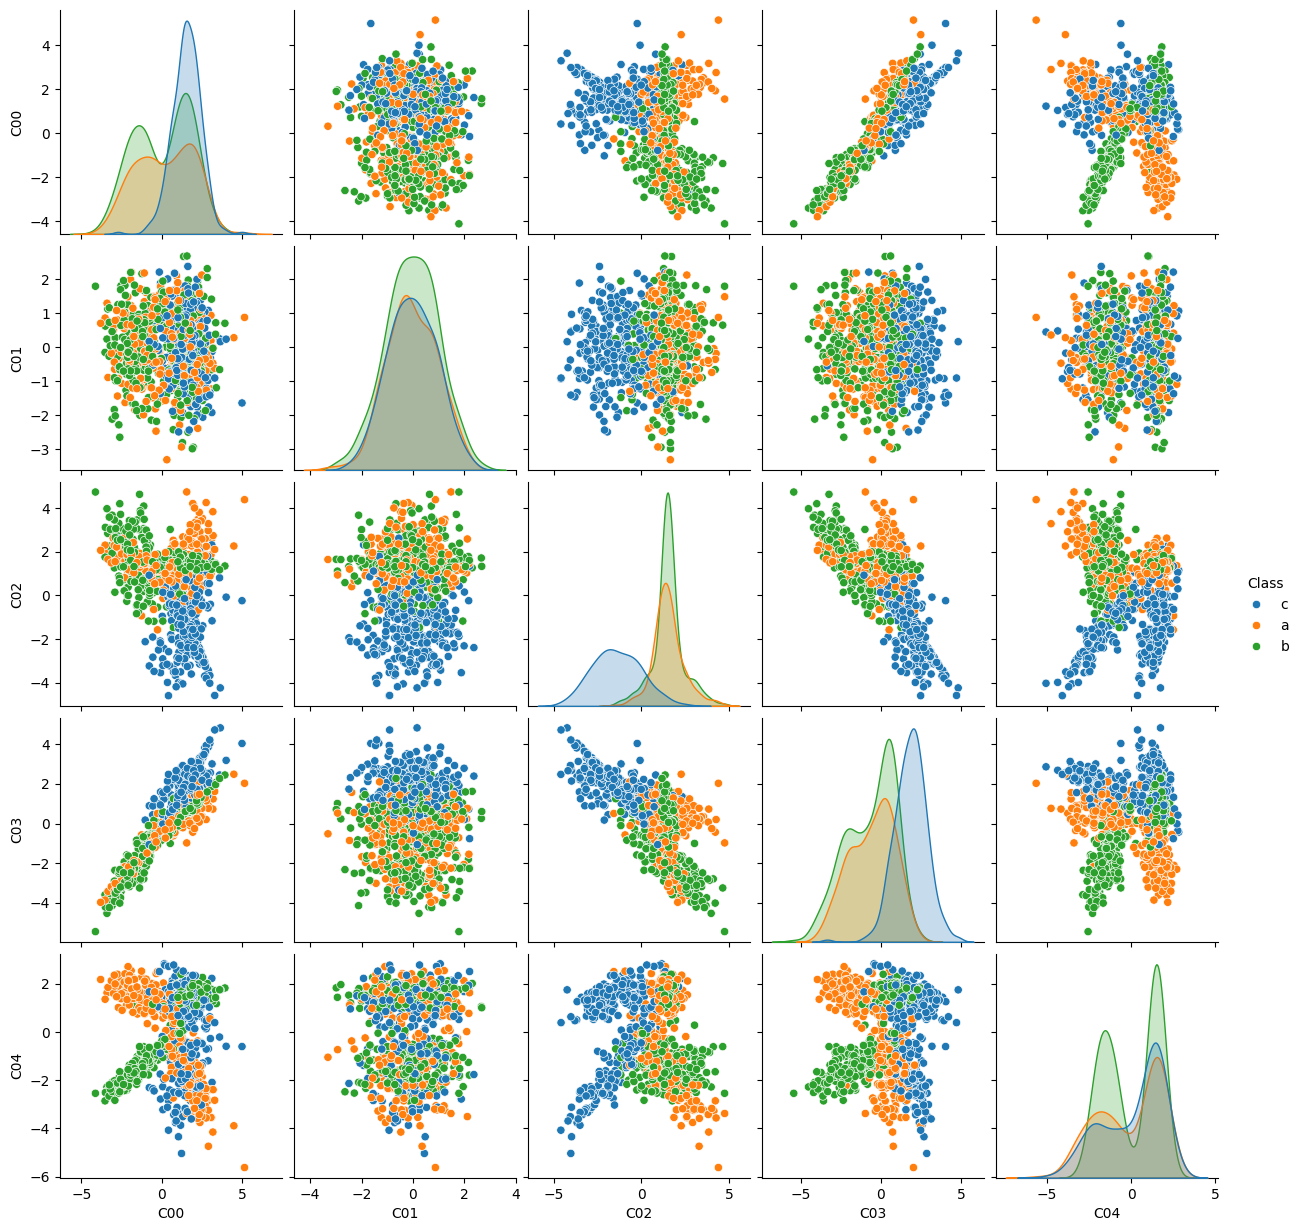

In [3]:
sns.pairplot(df, hue='Class')

nothing noticeable can be underline about the data

## 2. a classification model using a method of your choice with the schema "train-validationtest" exploring an appropriate range of parameter values (5pt)

We will use a **Decision Tree** classifier.\
Firstly we divide the target column from the rest of the features

In [4]:
X = df.drop(columns=[target])
y = df[target]

We then divide the data in two, one for training the classifier and the other to test it after the training

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=2/3)

print(f"there are {X_train.shape[0]} training samples")
print(f"there are {X_test.shape[0]} test samples")

there are 666 training samples
there are 334 test samples


We then instantiate the classifier and fit it (train) on the training data previously split.\

When done we predict the classifier over the training data using the **accuracy_score** function. We expect an accuracy of 100%.

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

estimator = DecisionTreeClassifier(criterion='entropy', random_state=random_state)
estimator.fit(X_train, y_train)

y_pred_train = estimator.predict(X_train)
scoring = accuracy_score(y_train, y_pred_train) * 100

print(f"the accuracy on the training set is: {scoring:.2f}%")

the accuracy on the training set is: 100.00%


We should now try to predict the target over the test set and evaluate its accuracy score. This ensures a more meaningful measurement

In [7]:
y_pred_test = estimator.predict(X_test)
scoring = accuracy_score(y_test, y_pred_test) * 100

print(f"the accuracy on the test set is: {scoring:.2f}%")

the accuracy on the test set is: 87.43%


The task requires us to use the train-validationtest schema, so we will split again the test data to obtain a validation and a test set

In [8]:
X_train_test, X_val, y_train_test, y_test_val = train_test_split(X_test, y_test, random_state=random_state)

print(f"there are {X_train_test.shape[0]} test samples in the set")
print(f"there are {X_val.shape[0]} validation samples in the set")

there are 250 test samples in the set
there are 84 validation samples in the set


## 3. the optimal parameter(s) (5pt)

Now we can look for the optimal parameter(s), we save the current depth of the tree in a variable and we will try various configurations

In [9]:
default_tree_depth = estimator.tree_.max_depth

depths = range(1, default_tree_depth + 1)

In [13]:
scores = []

for depth in depths:
    estimator = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=random_state)

    estimator.fit(X_train_test, y_train_test)

    predicted = estimator.predict(X_val)
    scores.append(accuracy_score(y_test_val, predicted) * 100)

scores

[67.85714285714286,
 70.23809523809523,
 76.19047619047619,
 77.38095238095238,
 80.95238095238095,
 85.71428571428571,
 86.90476190476191,
 86.90476190476191,
 86.90476190476191,
 86.90476190476191]

We can now plot the results and evaluate the results

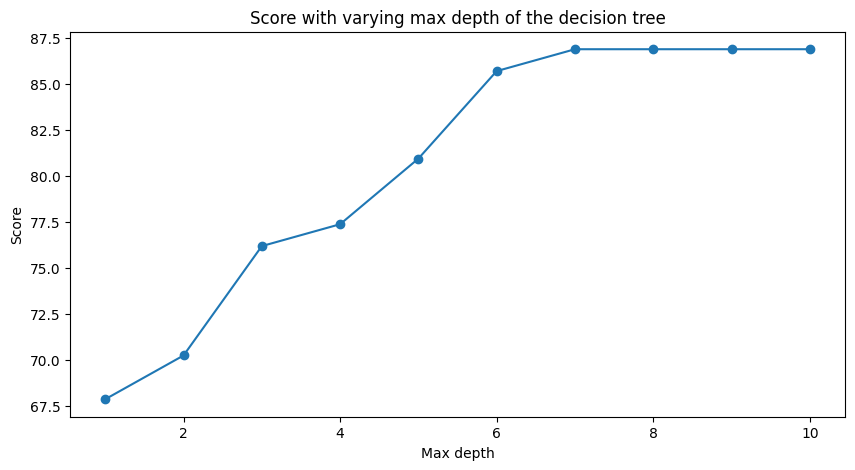

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(depths, scores, '-o')
plt.xlabel('Max depth')
plt.ylabel('Score')
plt.title('Score with varying max depth of the decision tree')
plt.show()

the best hyperparameter configuration is the one that maximises the accuracy

In [19]:
best_depth = depths[np.argmax(scores)]

print(f"the best depth of the tree is {best_depth}, with an accuracy of {scores[best_depth - 1]:.2f}%")

the best depth of the tree is 7, with an accuracy of 86.90%


we can now test our tuned estimator over the orginal data and compute its accuracy

In [21]:
estimator = DecisionTreeClassifier(criterion='entropy', random_state=random_state, max_depth=best_depth)

estimator.fit(X_train, y_train)
prediction = estimator.predict(X_test)

print(f"the tuned classifier has an accuracy of {accuracy_score(y_test, prediction)*100:.2f}%")

the tuned classifier has an accuracy of 87.13%


This demonstrates that we obtained a similar accuracy, with a more optimized tree

In [23]:
print(f"the depth of the original tree was {default_tree_depth}, the optimized one has {estimator.tree_.max_depth}")

the depth of the original tree was 10, the optimized one has 7


## 4. a scatter plot of the test set using a pair of attributes of your choice with the class as colour (5pt)

let's pick some random features of the dataset for the scatterplot

<Axes: xlabel='C00', ylabel='C01'>

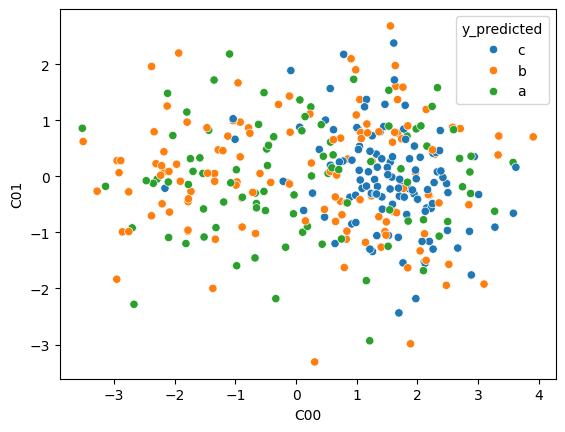

In [26]:
attributes = ['C00', 'C01']

scattered = X_test.assign(y_predicted=prediction)

sns.scatterplot(x=attributes[0], y=attributes[1], data=scattered, hue='y_predicted')

## 5 … and the good/bad prediction as the point style (5pt)

<Axes: xlabel='C00', ylabel='C01'>

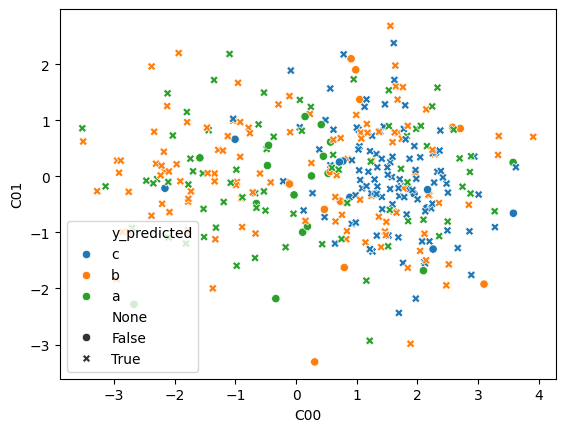

In [29]:
sns.scatterplot(x=attributes[0], y=attributes[1], data=scattered, hue='y_predicted', style=y_test == scattered['y_predicted'])

In [31]:
scattered

,C00,C01,C02,C03,C04,y_predicted
458,2.665592,-1.279006,1.066448,1.607035,0.205953,c
387,0.566075,0.197885,-0.071917,0.472465,1.745131,c
532,1.636080,1.974816,1.754038,0.466751,1.810016,b
895,2.198755,-0.337467,1.686341,0.942538,1.805108,b
239,1.553947,0.253720,-1.578949,1.955241,1.498683,c
...,...,...,...,...,...,...
593,-0.453480,0.552339,0.849260,-0.749156,-0.946425,a
850,-2.757864,-0.985531,2.531508,-3.346470,-2.118003,b
971,1.871988,0.313225,-0.814860,1.861521,-0.907186,c
804,1.075516,0.674412,1.449936,0.169474,0.997136,b


In [32]:
y_test

458    c
387    c
532    b
895    b
239    c
      ..
593    b
850    b
971    c
804    b
680    b
Name: Class, Length: 334, dtype: object